# **Project 2**, APS1070 Summer 2022

## **PCA and SVD**

# Part 1: Getting started [1 Mark]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot) so you can easily compare them).
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of Covid cases negative?) What does the sign of values indicate? **[0.25]**

In [ ]:
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649
Albania,0,0,0,0,0,0,0,0,0,0,...,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070
Algeria,0,0,0,0,0,0,0,0,0,0,...,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670
Andorra,0,0,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025
Angola,0,0,0,0,0,0,0,0,0,0,...,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583
Yemen,0,0,0,0,0,0,0,0,0,0,...,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585
Zambia,0,0,0,0,0,0,0,0,0,0,...,293695,295028,296132,296817,298032,299172,299971,300587,301203,301630


In [ ]:
print(cases_raw.columns)
print(cases_raw.index)

Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       ...
       '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23'],
      dtype='object', length=733)
Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uruguay', 'US', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=196)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_covid(data, country_list):
    
    fig, axes = plt.subplots(1, len(country_list), figsize=(24,8), sharex=False, sharey=False)
    
    if (len(country_list)==1):
        axes.set_xticks(np.arange(1, 800, 100))
        
        axes.plot(data.loc[country_list[0]])
        
        axes.set_title(country_list[0])

        axes.set(xlabel='Date', ylabel='Cases')
    
    else:
        for i in range(len(country_list)):
            axes[i].set_xticks(np.arange(1, 800, 100))
            
            axes[i].plot(data.loc[country_list[i]])
            
            axes[i].set_title(country_list[i])


        for ax in axes.flat:
            ax.set(xlabel='Date', ylabel='Cases')

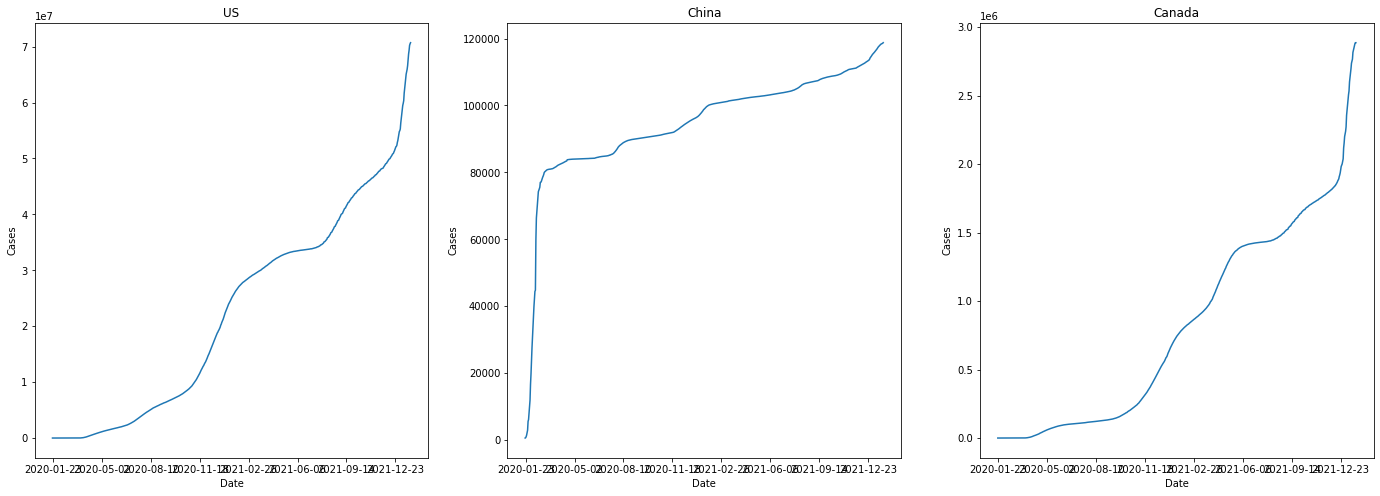

In [ ]:
plot_covid(cases_raw, ['US', 'China', 'Canada'])

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

In [ ]:
### YOUR CODE HERE ###

cases_scaled = pd.DataFrame(scaler.fit_transform(cases_raw.values), columns=cases_raw.columns, index=cases_raw.index)

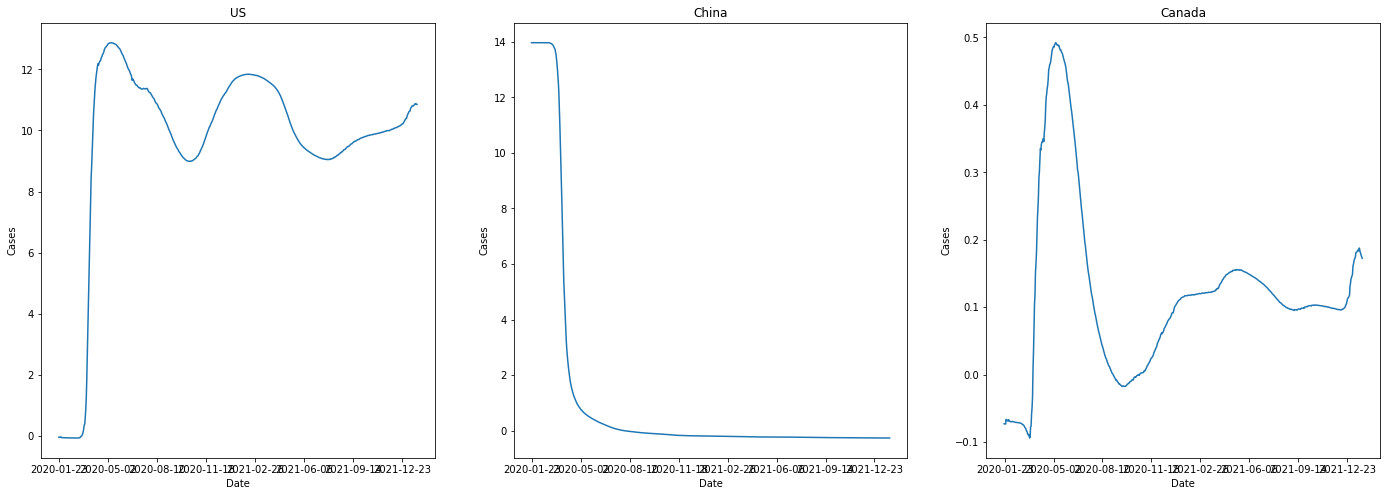

In [ ]:
plot_covid(cases_scaled, ['US', 'China', 'Canada'])

4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of Covid cases negative?) What does the sign of values indicate? **[0.25]**

**Answer.** The dataset 'cases_scaled' has the number of cases standardized per day, for all countries. Thus, even though the cumulative number of cases for any country always increases with time, its rate of increase might be different at different times. If the rate of increase is less than the rate of increase than the average rate of increase for all countries, the curve for standardized dataset will go down.

Negative values on the curve imply that the cumulative cases of a particular country on a particular day are lower than the average number of cumulative cases for all countries on that day. Positive values imply that the cumulative cases for that country are higher than the global average on that day.

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1) and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each component and a line to show cumulative --similar to tutorial. Limit x-axis if needed to better see the plot). **[0.25]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element). **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any differences in their trend? **[0.5]**

In [ ]:
### YOUR CODE HERE ###

n,m = cases_scaled.shape

Cov_matrix = np.dot(cases_scaled.T, cases_scaled) / (n-1)   #Compute covariance matrix

print(Cov_matrix.shape)

(733, 733)


In [ ]:
def get_sorted_eigen(df_cov):

    eigenValues, eigenVectors = np.linalg.eigh(df_cov)

    args = (-eigenValues).argsort()
    eigenValues = eigenValues[args]
    eigenVectors = eigenVectors[:, args]

    return eigenValues, eigenVectors

In [ ]:
eigenValues, eigenVectors = get_sorted_eigen(Cov_matrix)

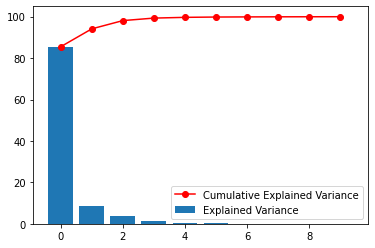

In [ ]:
# Scree Plot

eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

expVar_restricted = expVar[0:10]
cumExpVar_restricted = cumExpVar[0:10]

plt.bar(range(10), expVar_restricted, label='Explained Variance')
plt.plot(cumExpVar_restricted, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
i = 0
for i in range(len(cumExpVar)):
    if (cumExpVar[i]>=98):
        print("Number of Principal Components to cover 98% Variance = ", i+1)
        break

print(cumExpVar[i])

Number of Principal Components to cover 98% Variance =  3
98.08990311382456


4. How many PCs do you need to cover 98% of the dataset's variance? **[0.25]**

We need 3 Principal Components to cover 98% of the variance

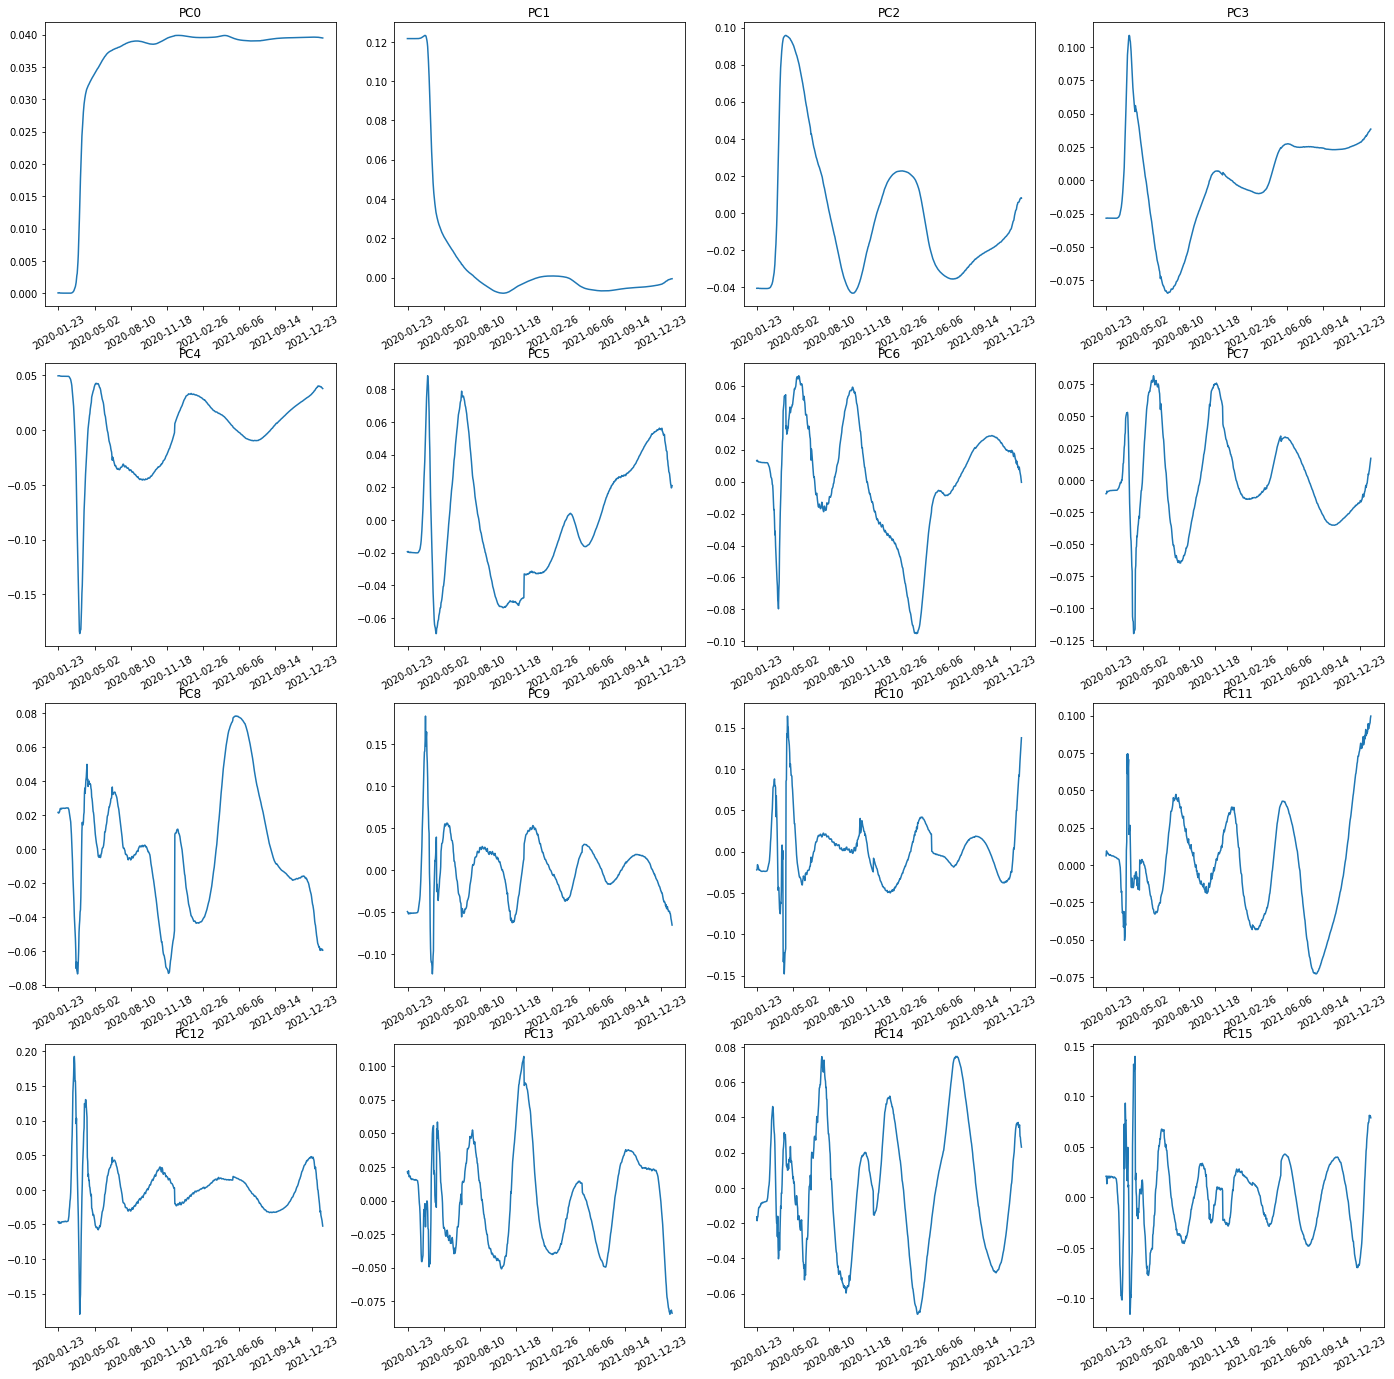

In [ ]:
#Plotting 16 principal components

fig = plt.figure(figsize=(24,24))
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    plt.plot(cases_raw.columns, eigenVectors[:,i])
    plt.xticks(np.arange(1, 800, 100))
    plt.xticks(rotation = 30)
    plt.title('PC'+str(i))

6. Compare the first few PCs with the rest of them. Do you see any differences in their trend? **[0.5]**

The first few PCs have a relatively smoother time series. This is because they describe the general trend in the dataset. The other PCs have great fluctuations as they describe the more sensitive features of the dataset, and do not exhibit any general pattern.

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[0.5]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**

In [ ]:
def reconstruction_original(original_df, country_name):

    fig, axes = plt.subplots(3, 1, figsize=(24,8), sharex=False, sharey=False)
    

    df_scaled = scaler.fit_transform(original_df.values)

    n,m = df_scaled.shape
    Cov_matrix = np.dot(df_scaled.T, df_scaled) / (n-1)

    eigenValues, eigenVectors = get_sorted_eigen(Cov_matrix)

    PCs = [1, 2, 4, 8, 16]

    for pc in PCs:

        W = eigenVectors[:, 0:pc]
        projected = np.dot(df_scaled , W)
        reconstructed = np.dot(projected , W.T)
        reconstructed_original = scaler.inverse_transform(reconstructed)

        reconstructed_df = pd.DataFrame(reconstructed_original ,columns=original_df.columns, index=original_df.index)

        axes[0].set_title("Reconstruction using PCs")
        axes[0].plot(range(original_df.shape[1]), reconstructed_df.loc[country_name].values.ravel(), label=str(pc)+'PCs')
        axes[0].legend()

        if (pc==16):
            axes[1].set_title("Residual Error for 16 PCs")
            axes[1].plot(range(original_df.shape[1]),(original_df-reconstructed_df).loc[country_name].values.ravel())


    rmse=[]

    for pc in range(1,101):
        
        W = eigenVectors[:, 0:pc]

        projected = np.dot(df_scaled , W)
        reconstructed = np.dot(projected , W.T)
        reconstructed_original = scaler.inverse_transform(reconstructed)

        reconstructed_df = pd.DataFrame(reconstructed_original ,columns=original_df.columns, index=original_df.index)

        rmse.append(np.sqrt(((original_df - reconstructed_df).loc[country_name].values.ravel() ** 2).mean()))

    axes[2].set_title("RMSE as a Function of PCs")
    axes[2].plot(range(1,101),rmse)

In [ ]:
### YOUR CODE HERE ###

def plot_country_figures(original_df, country_name):

    plot_covid(original_df, [country_name]) #Original Time-series (3.1)

    reconstruction_original(cases_raw, country_name)  # Reconstruction (3.2) and RMSE (3.3)


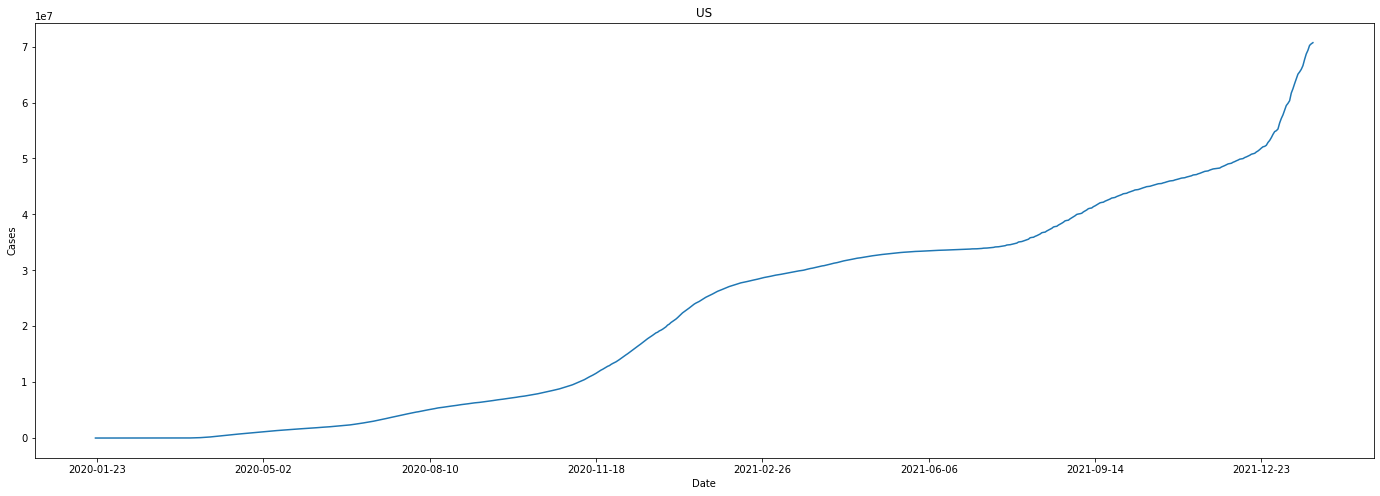

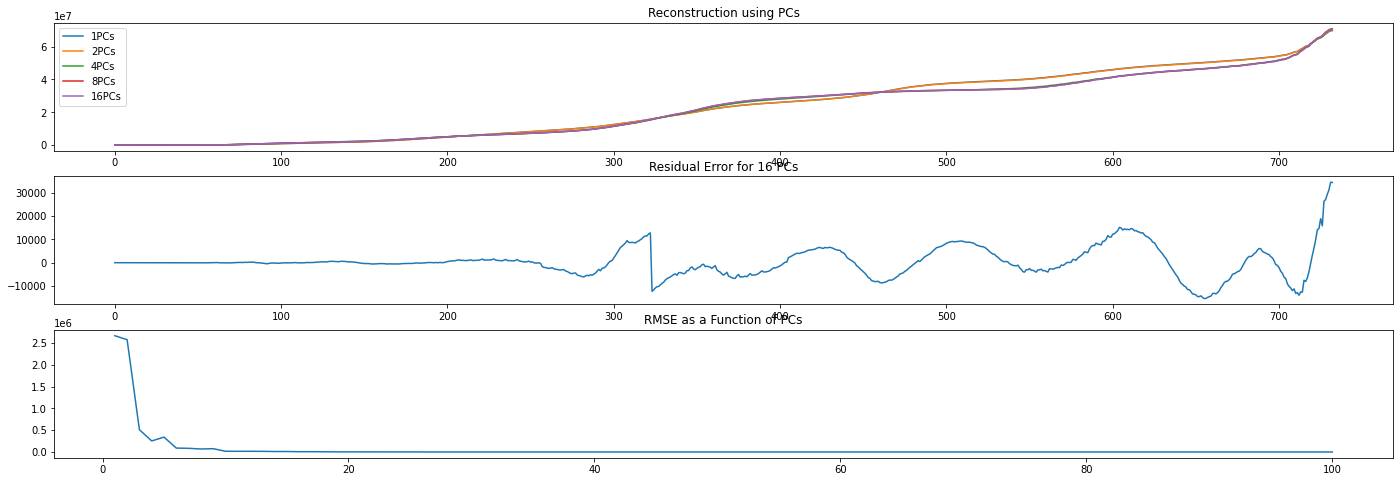

In [ ]:
plot_country_figures(cases_raw, 'US')

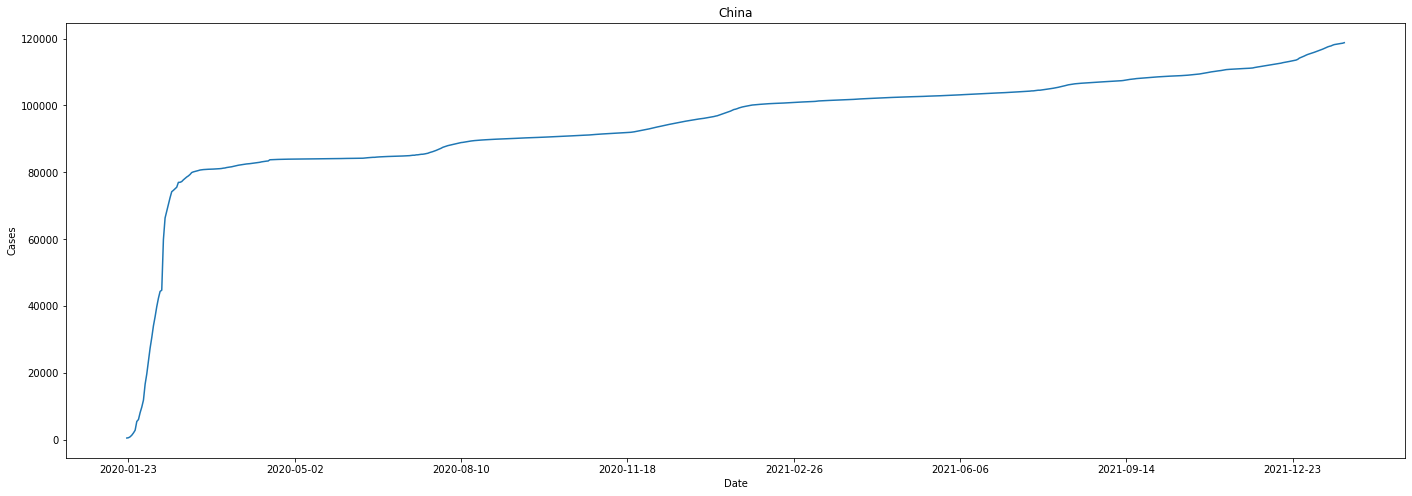

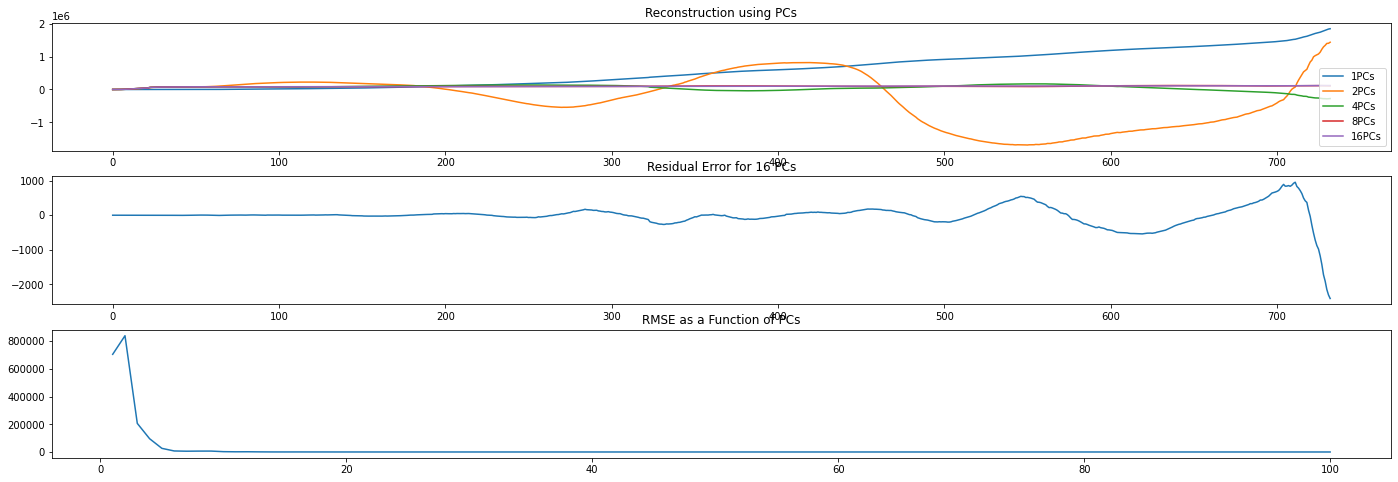

In [ ]:
plot_country_figures(cases_raw, 'China')

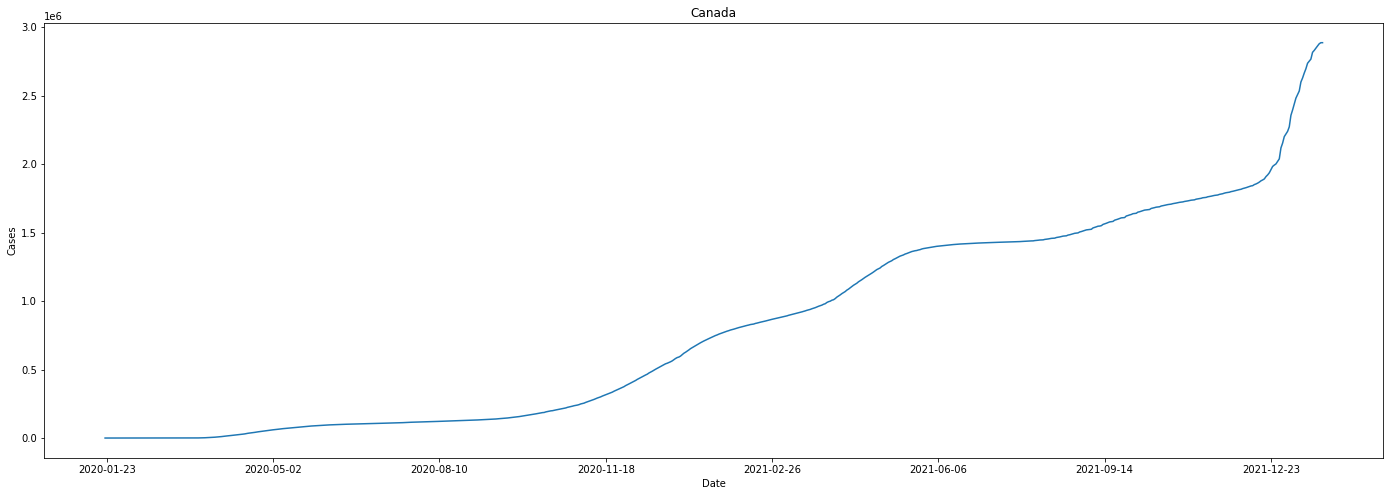

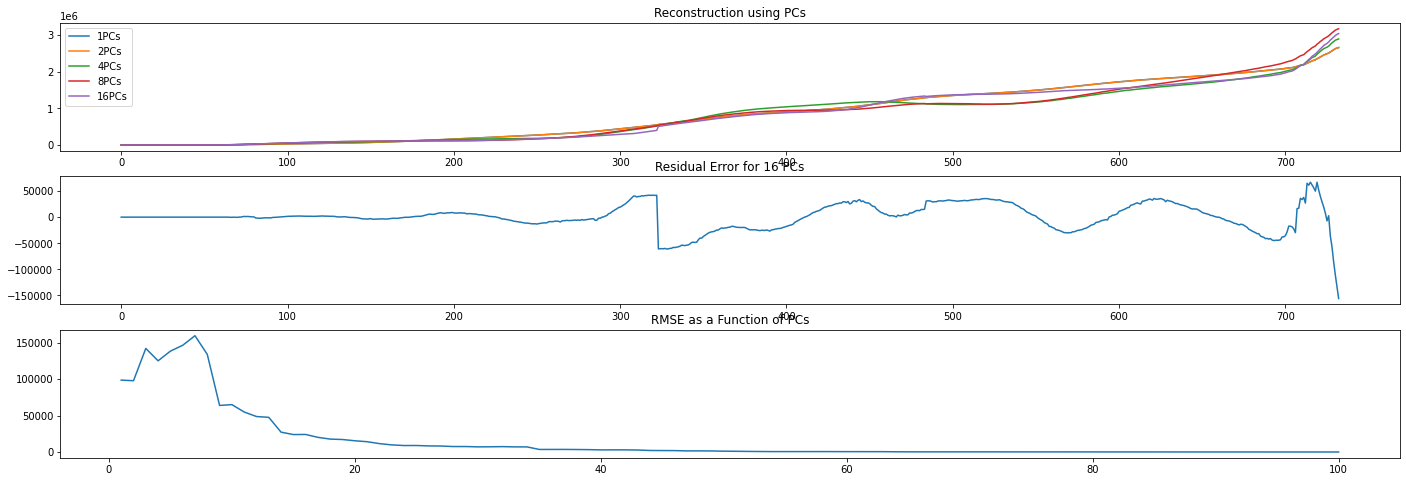

In [ ]:
plot_country_figures(cases_raw, 'Canada')

# Part 4: SVD [2 Marks]
Modify your function in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[0.5]**

Explain if standardization or covariance computation is required for this part.**[0.5]**

Repeat part 3 and compare your PCA and SVD results. **[1]**



In [ ]:
### YOUR CODE HERE ###

def reconstruction_original_svd(original_df, country_name):

    fig, axes = plt.subplots(3, 1, figsize=(24,12), sharex=False, sharey=False)

    U, s, V = np.linalg.svd(original_df)
    
    PCs = [1, 2, 4, 8, 16]

    for pc in PCs:
        
        reconstructed_original = (U[:,0:pc] * s[0:pc])@V[0:pc,:]
        reconstructed_df = pd.DataFrame(reconstructed_original ,columns=original_df.columns, index=original_df.index)

        axes[0].set_title("Reconstruction using SVD")
        axes[0].plot(range(original_df.shape[1]), reconstructed_df.loc[country_name].values.ravel(), label=str(pc)+'PCs')
        axes[0].legend()

        if (pc==16):
            axes[1].set_title("Residual Error for 16 PCs")
            axes[1].plot(range(original_df.shape[1]),(original_df-reconstructed_df).loc[country_name].values.ravel())


    rmse=[]

    for pc in range(1,101):
        
        reconstructed_original = (U[:,0:pc] * s[0:pc])@V[0:pc,:]
        reconstructed_df = pd.DataFrame(reconstructed_original ,columns=original_df.columns, index=original_df.index)

        rmse.append(np.sqrt(((original_df - reconstructed_df).loc[country_name].values.ravel() ** 2).mean()))

    axes[2].set_title("RMSE as a Function of PCs")
    axes[2].plot(range(1,101),rmse)

In [ ]:
def plot_country_figures_svd(original_df, country_name):

    plot_covid(original_df, [country_name]) #Original Time-series 

    reconstruction_original_svd(cases_raw, country_name)  # Reconstruction and RMSE 


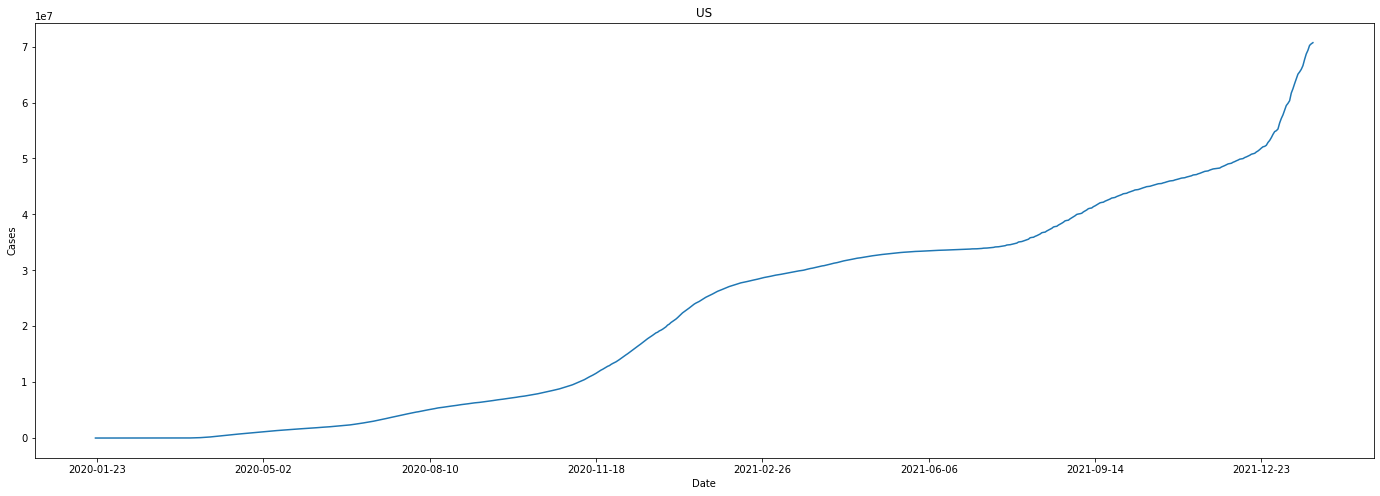

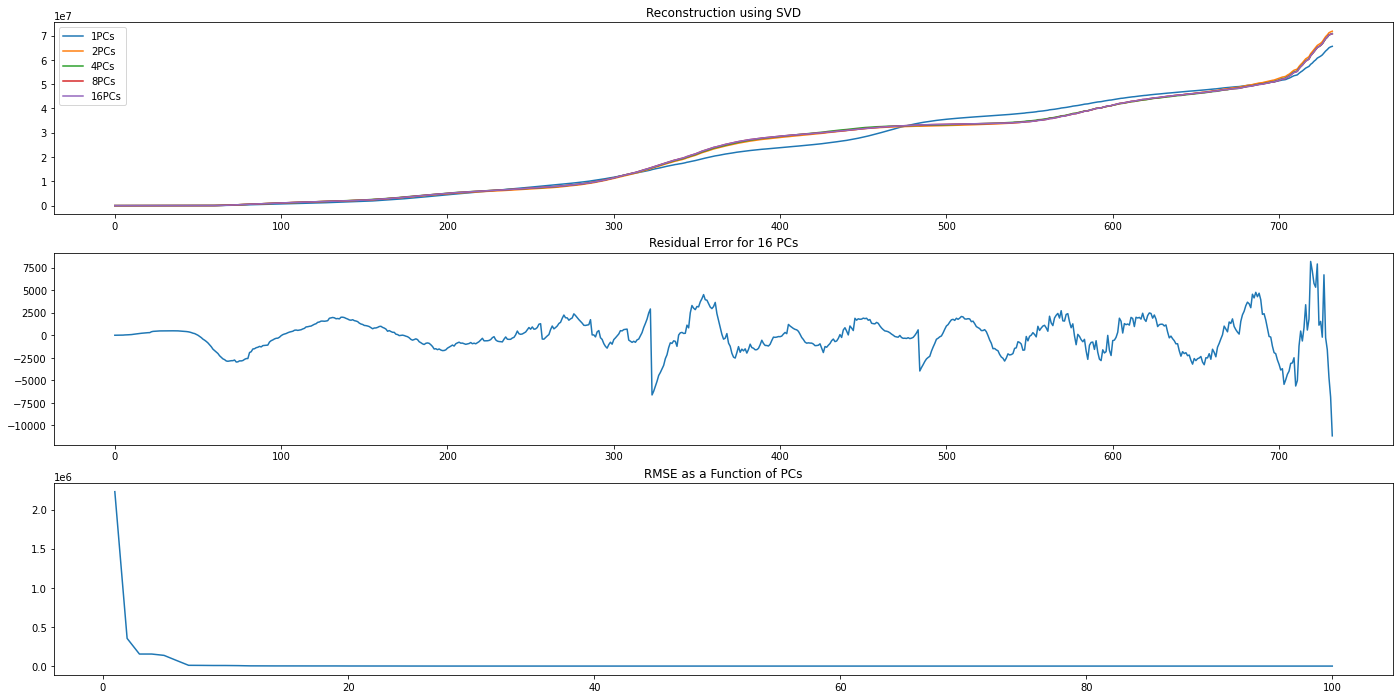

In [ ]:
plot_country_figures_svd(cases_raw, 'US')

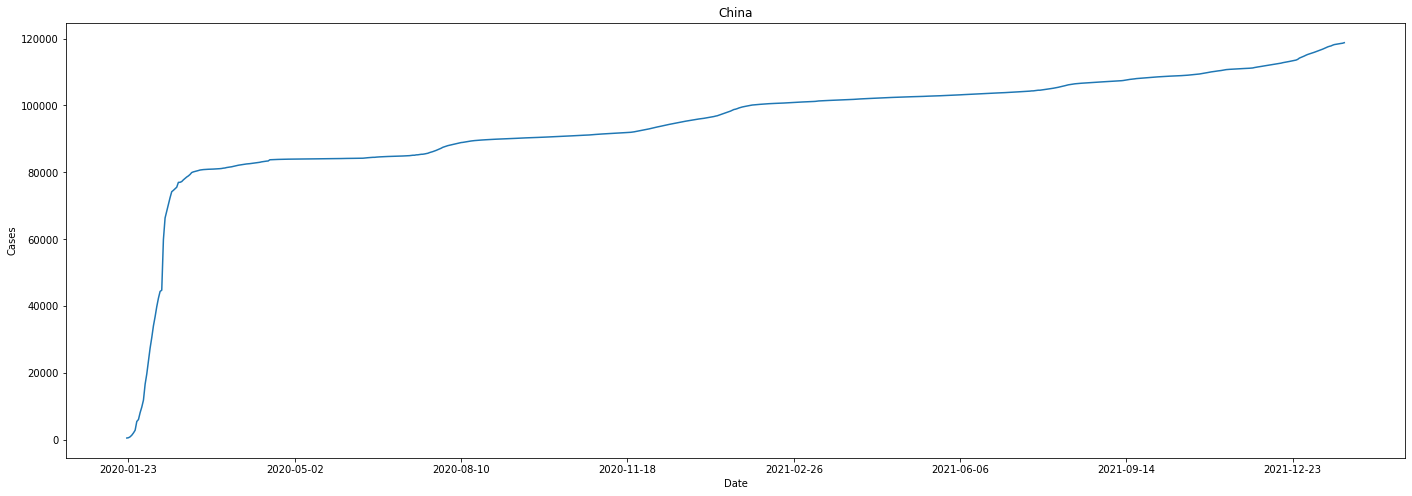

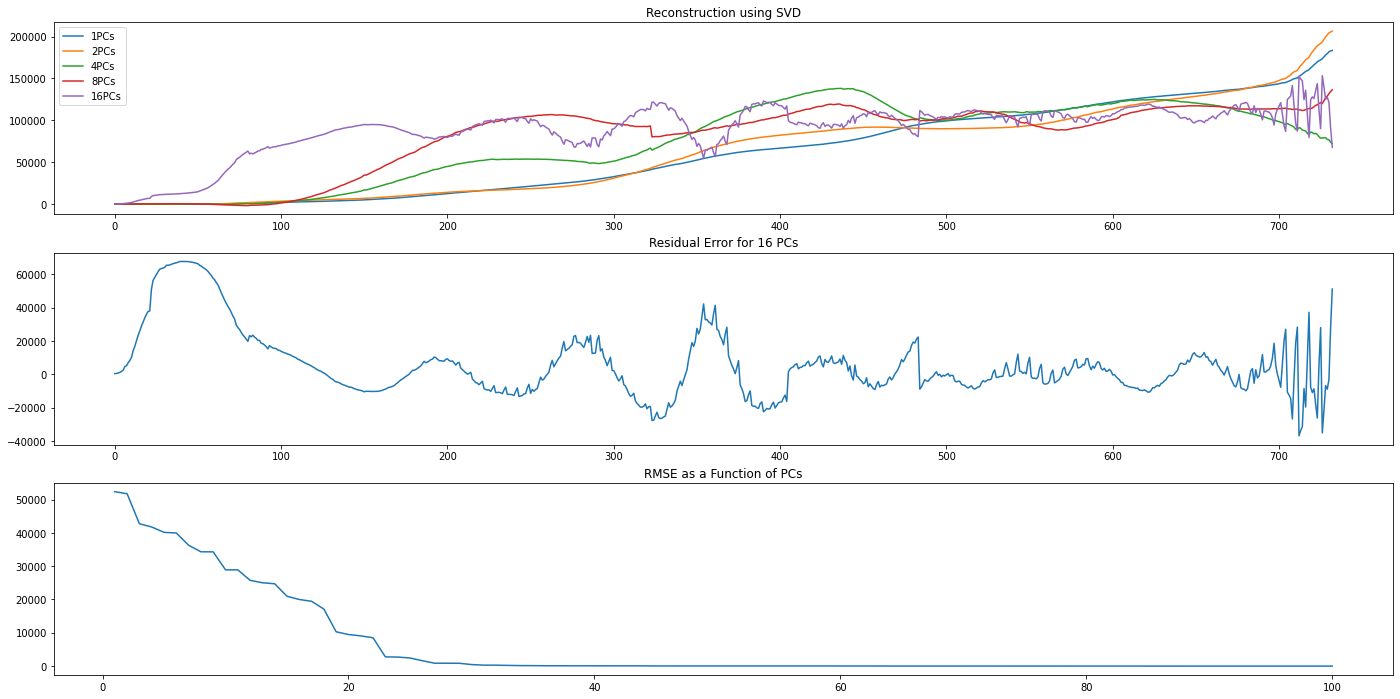

In [ ]:
plot_country_figures_svd(cases_raw, 'China')

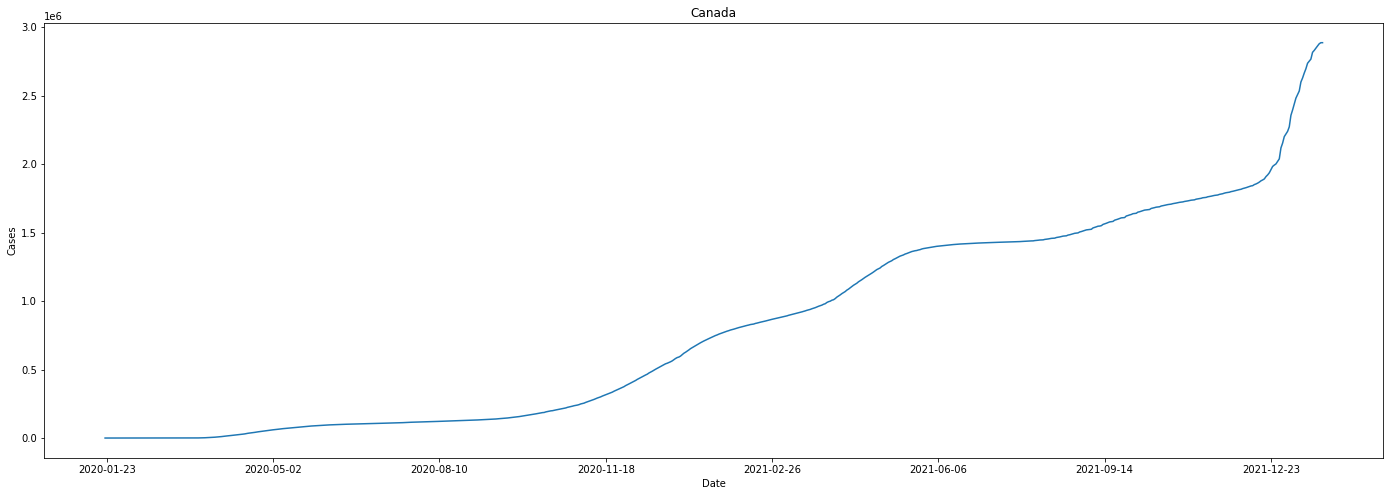

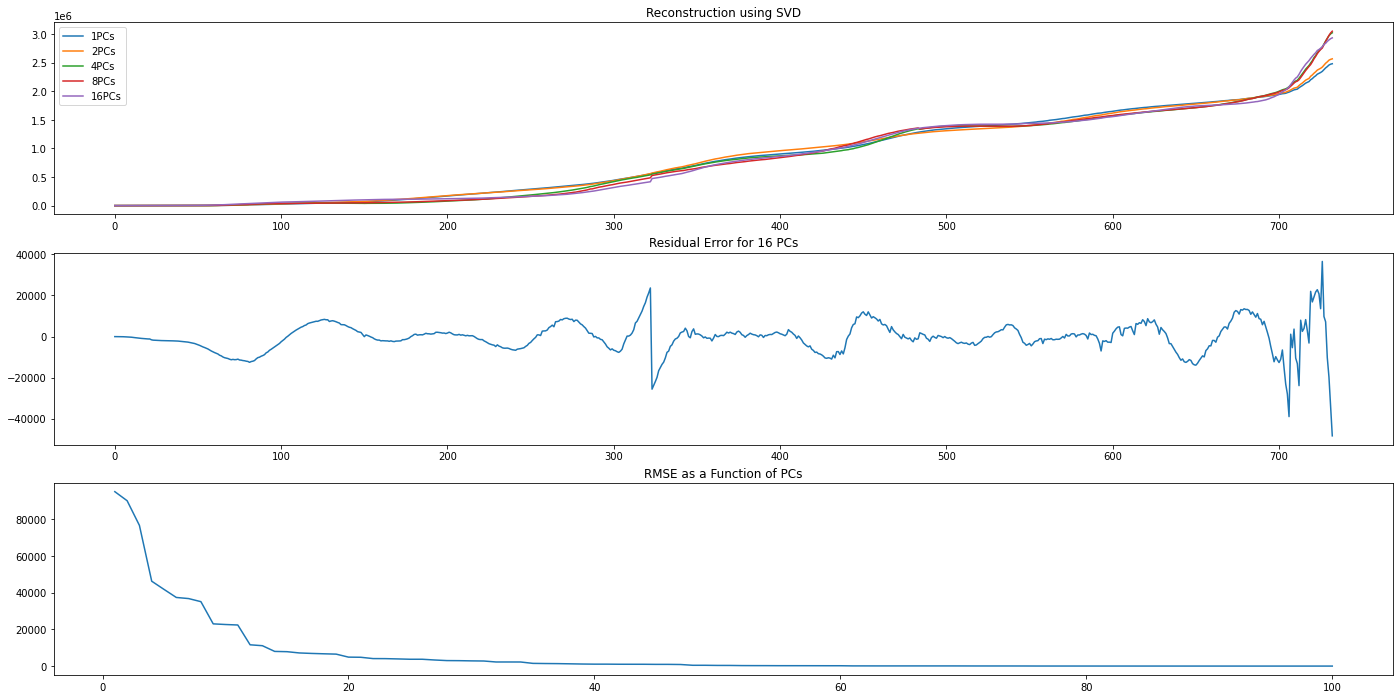

In [ ]:
plot_country_figures_svd(cases_raw, 'Canada')

Explain if standardization or covariance computation is required for this part.**[0.5]**

**No**, Standardization or Covariance computation is not required when computing the SVD.

In PCA, we need to compute the covariance matrix, and hence, need to standardize the dataset. This is because the variance of individual features will impact the covariance matrix, and thus the standard deviation should be made 1 by standardization.

Since SVD does not require computation of a covariance matrix, we do not need to standardize the data.

In [ ]:
def pca_vs_svd(original_df, country_name):

    fig, axes = plt.subplots(3, 1, figsize=(24,8), sharex=False, sharey=False)
    
    df_scaled = scaler.fit_transform(original_df.values)

    n,m = df_scaled.shape
    Cov_matrix = np.dot(df_scaled.T, df_scaled) / (n-1)

    U, s, V = np.linalg.svd(original_df)

    eigenValues, eigenVectors = get_sorted_eigen(Cov_matrix)

    pc = 16

    W = eigenVectors[:, 0:pc]
    projected = np.dot(df_scaled , W)
    reconstructed = np.dot(projected , W.T)
    reconstructed_original = scaler.inverse_transform(reconstructed)

    reconstructed_df = pd.DataFrame(reconstructed_original ,columns=original_df.columns, index=original_df.index)

    axes[0].set_title("Reconstruction using PCs")
    axes[0].plot(range(original_df.shape[1]), reconstructed_df.loc[country_name].values.ravel(), label='PCA')
    axes[0].legend()

    axes[1].set_title("Residual Error for 16 PCs")
    axes[1].plot(range(original_df.shape[1]),(original_df-reconstructed_df).loc[country_name].values.ravel(), label='PCA')


    reconstructed_original = (U[:,0:pc] * s[0:pc])@V[0:pc,:]
    reconstructed_df = pd.DataFrame(reconstructed_original ,columns=original_df.columns, index=original_df.index)

    axes[0].plot(range(original_df.shape[1]), reconstructed_df.loc[country_name].values.ravel(), label='SVD')
    axes[0].legend()

    axes[1].plot(range(original_df.shape[1]),(original_df-reconstructed_df).loc[country_name].values.ravel(), label='SVD')
    axes[1].legend()

    rmse_pca=[]
    rmse_svd=[]

    for pc in range(1,101):
        
        W = eigenVectors[:, 0:pc]

        projected = np.dot(df_scaled , W)
        reconstructed = np.dot(projected , W.T)
        reconstructed_original = scaler.inverse_transform(reconstructed)

        reconstructed_df = pd.DataFrame(reconstructed_original ,columns=original_df.columns, index=original_df.index)

        rmse_pca.append(np.sqrt(((original_df - reconstructed_df).loc[country_name].values.ravel() ** 2).mean()))


        reconstructed_original = (U[:,0:pc] * s[0:pc])@V[0:pc,:]
        reconstructed_df = pd.DataFrame(reconstructed_original ,columns=original_df.columns, index=original_df.index)

        rmse_svd.append(np.sqrt(((original_df - reconstructed_df).loc[country_name].values.ravel() ** 2).mean()))

    axes[2].set_title("RMSE as a Function of PCs")
    axes[2].plot(range(1,101),rmse_pca,'red',label='PCA')
    axes[2].plot(range(1,101),rmse_svd,'blue',label='SVD')
    axes[2].legend()

In [ ]:
def plot_country_figures_pca_svd(original_df, country_name):

    plot_covid(original_df, [country_name]) #Original Time-series 

    pca_vs_svd(cases_raw, country_name)  # Reconstruction and RMSE 


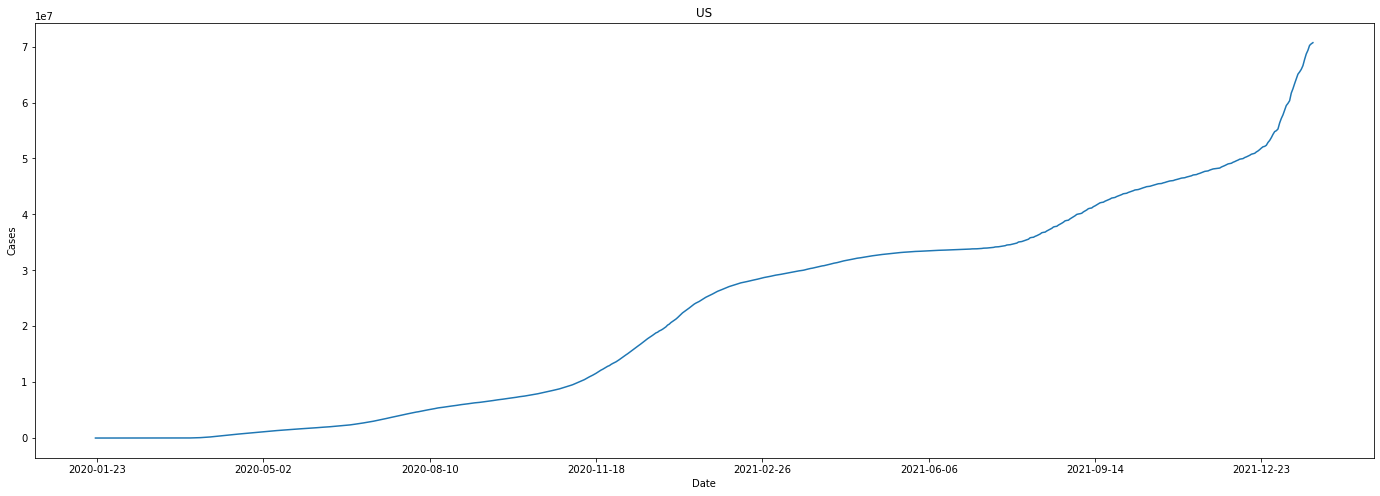

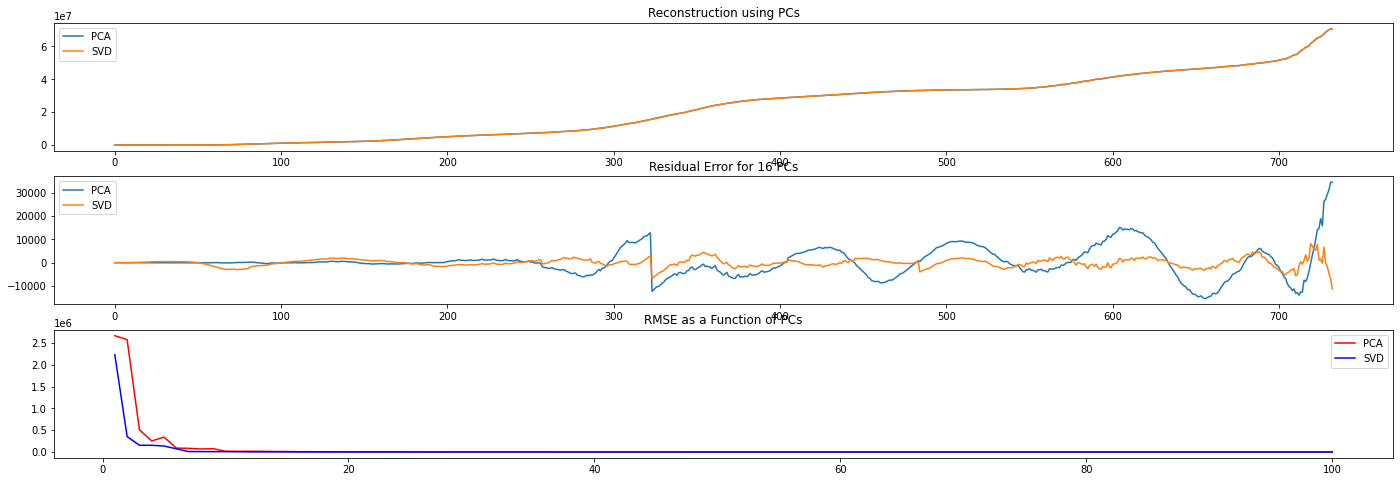

In [ ]:
plot_country_figures_pca_svd(cases_raw, 'US')

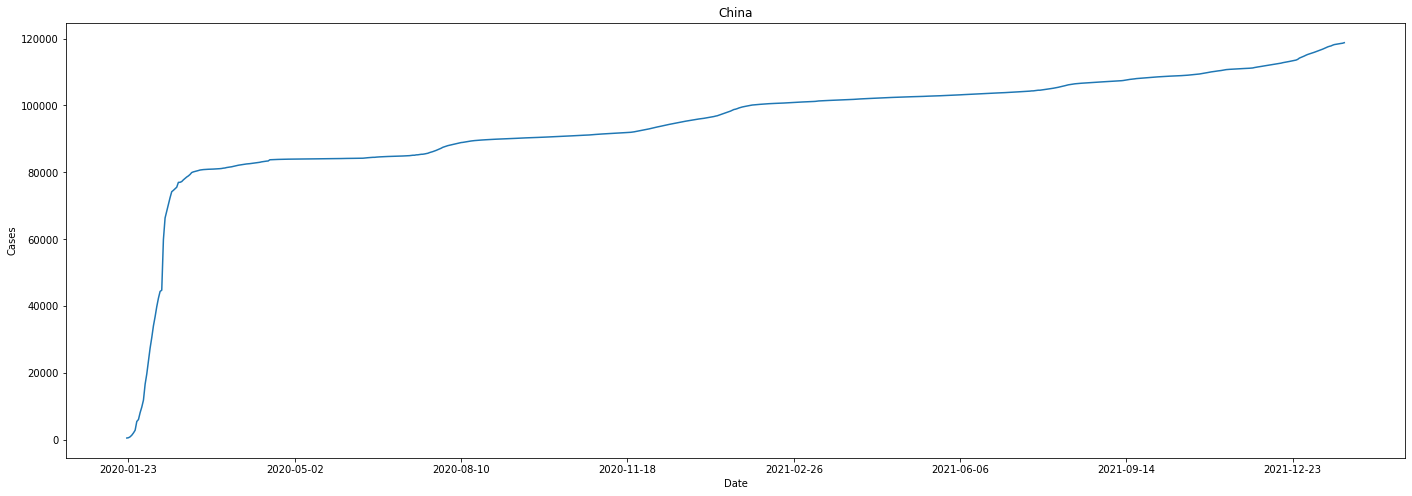

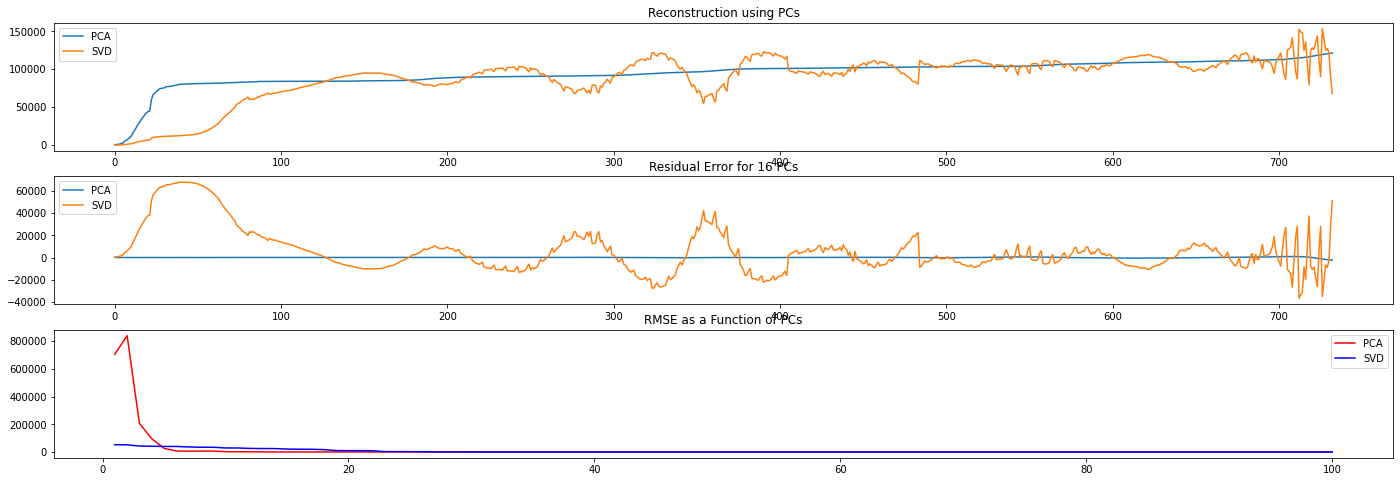

In [ ]:
plot_country_figures_pca_svd(cases_raw, 'China')

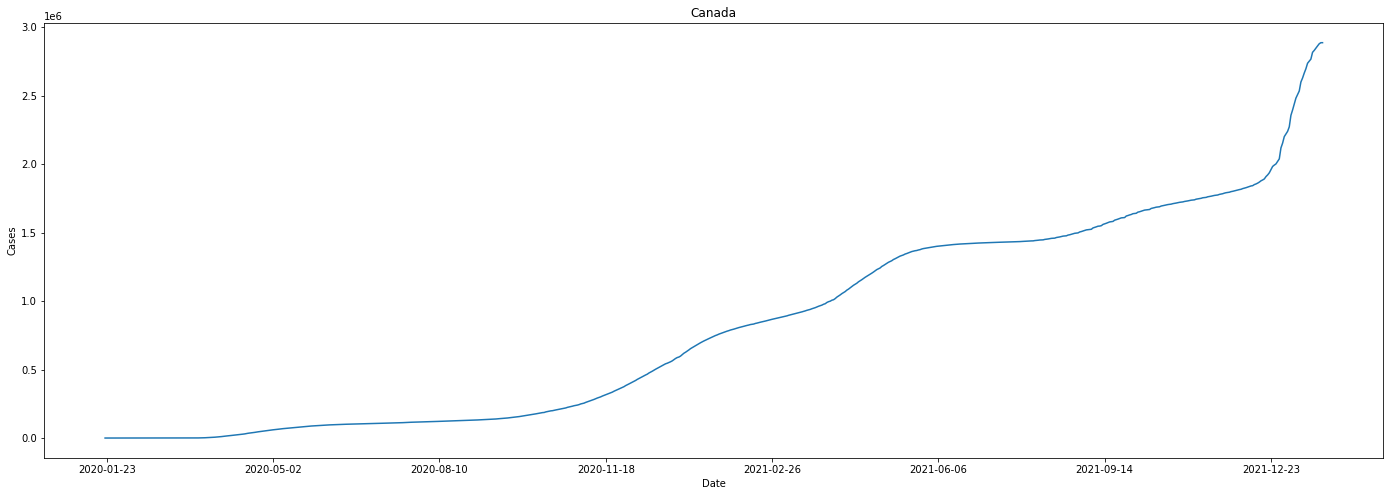

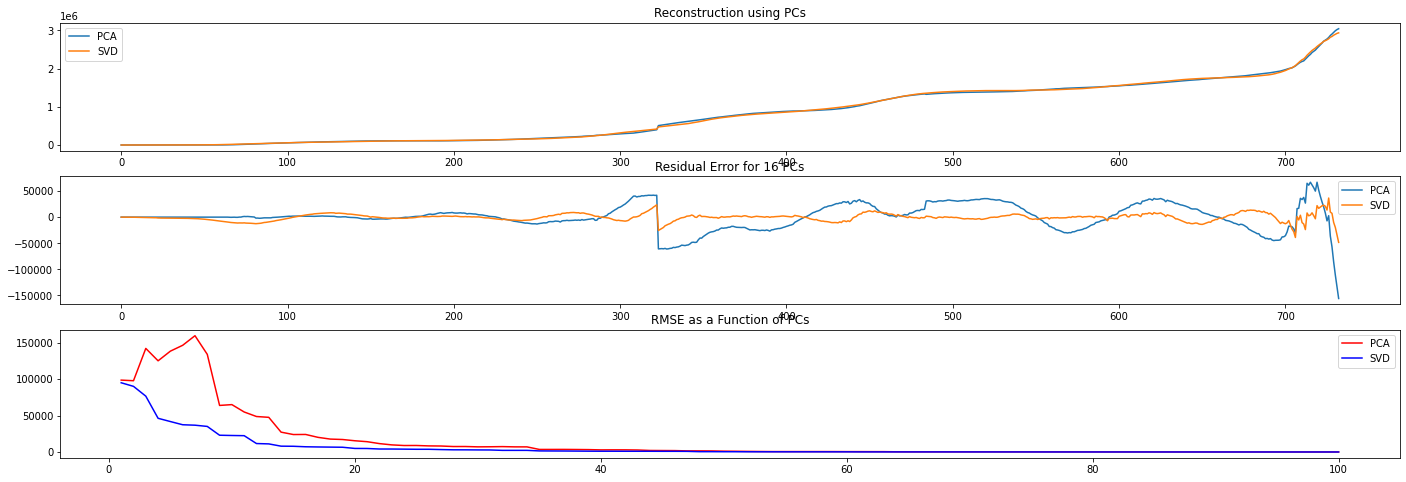

In [ ]:
plot_country_figures_pca_svd(cases_raw, 'Canada')

# Part 5: Fashion-MNIST dataset [2 Marks]
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels). 
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. Why? **[0.25]**

    * **PCA finds principal components that explain the highest variance. Items that are similar in shape will have common principal components. On the other hand, items that greatly differ in shape will have different directions of high variance, and hence finding a common principal component would be difficult.**

* Compute Eigenvectors and Eigenvalues using SVD. **[0.25]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.25]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ principal components. **[0.5]** : **Reconstruct(dataset, n, id)**
* Run your function a few times and determine how many components are required so that we (humans!) can identify the items. **[0.25]** : **75 components (from reconstructions for various images, shown below)**
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and they can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[0.5]**
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [ ]:
x.shape

(1000, 784)

In [ ]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,178.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,...,26.0,13.0,2.0,24.0,31.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

0      9
1      0
2      0
3      3
4      0
      ..
995    7
996    3
997    3
998    9
999    8
Name: class, Length: 1000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
# Finding the size of each class
i = '0'
while(True):
    print(len(x[y==i]))
    i = str(int(i) + 1)
    if(i=='10'):
        break

107
104
86
92
95
100
100
115
102
99


In [ ]:
#Taking classes to be [5, 7, 9] as all three are types of shoes, hence most closely related

x_0 = x[y=='5']
x_4 = x[y=='7']
x_6 = x[y=='9']

x_new = x[(y=='5') + (y=='7') + (y=='9')]

Label is: Ankle boot


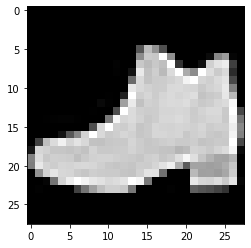

In [ ]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 15
plt.imshow(x.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

In [ ]:
### YOUR CODE HERE ###

x_new_mean = np.mean(x_new, axis=0)

x_new_mean_sub = x_new - x_new_mean #subtracted the mean

U,s,V = np.linalg.svd(x_new_mean_sub,full_matrices=False)

In [ ]:
s_sq = s*s

eigenValues = s_sq / (len(s) - 1)

In [ ]:
print(eigenValues.shape)

for i in range(10):
    print(eigenValues[i])

(314,)
994502.2710524842
423714.504301053
231504.35304924252
101607.69321682236
77899.9532806781
67417.35185630538
58278.57095382498
53178.50284622987
48380.33037252726
45440.46292951479


In [ ]:
eigenVectors = V.T  #each V[i] corresponds to an eigenvector/eigenface of shape 784 = 28*28

In [ ]:
print(eigenVectors.shape)
print(eigenValues.shape)

(784, 314)
(314,)


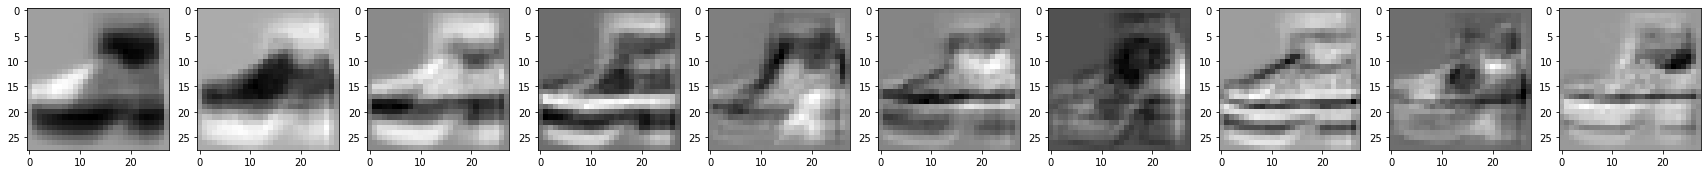

In [ ]:
#Plot 10 eigenvectors

fig, axes = plt.subplots(1,10,figsize=(30,30))

for i in range(10):
    axes[i].imshow(eigenVectors[:,i].reshape(28,28), cmap = plt.cm.gray)

The first few eigenvectors correspond to more general features like shape, and the other eigenvectors correspond to more specific/detailed features.

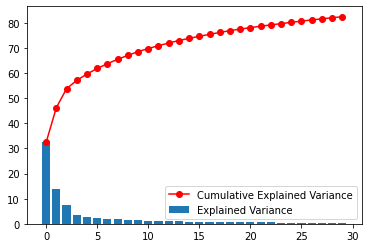

In [ ]:
# Scree Plot

eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

expVar_restricted = expVar[0:30]
cumExpVar_restricted = cumExpVar[0:30]

plt.bar(range(30), expVar_restricted, label='Explained Variance')
plt.plot(cumExpVar_restricted, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
# 98% variance for x_new dataset

i = 0
for i in range(len(cumExpVar)):
    if (cumExpVar[i]>=98):
        print("Number of Principal Components to cover 98% Variance = ", i+1)
        break

print(cumExpVar[i])

Number of Principal Components to cover 98% Variance =  149
98.00731394960911


In [ ]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [ ]:
#x_new.values[1].shape
eigenVectors.shape

(784, 314)

In [ ]:
#Fuction to take dataset and n to plot image reconstructed using n eigenvectors

import random

def Reconstruct(dataset, n, id=-1):

    if (id<0):  #id, if provided, can override random number, so that we can control which image we would like to see 
        image_idx = random.randint(0, dataset.shape[0]-1)
    else:
        image_idx=id

    P = project(eigenVectors[:, 0:n], dataset.values[image_idx], np.mean(dataset,axis=0))
    R = reconstruct(eigenVectors[:, 0:n], P, np.mean(dataset,axis=0))

    plt.imshow(R.values.reshape(28,28), cmap = plt.cm.gray)

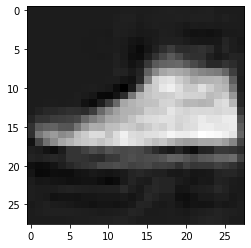

In [ ]:
Reconstruct(x_new, 20)

Run your function a few times and determine how many components are required so that we (humans!) can identify the items. **[0.25]**

**For this question, I have introduced the 'id' parameter in Reconstruct(), so that I can plot the reconstruction for a particular image with different values of n**

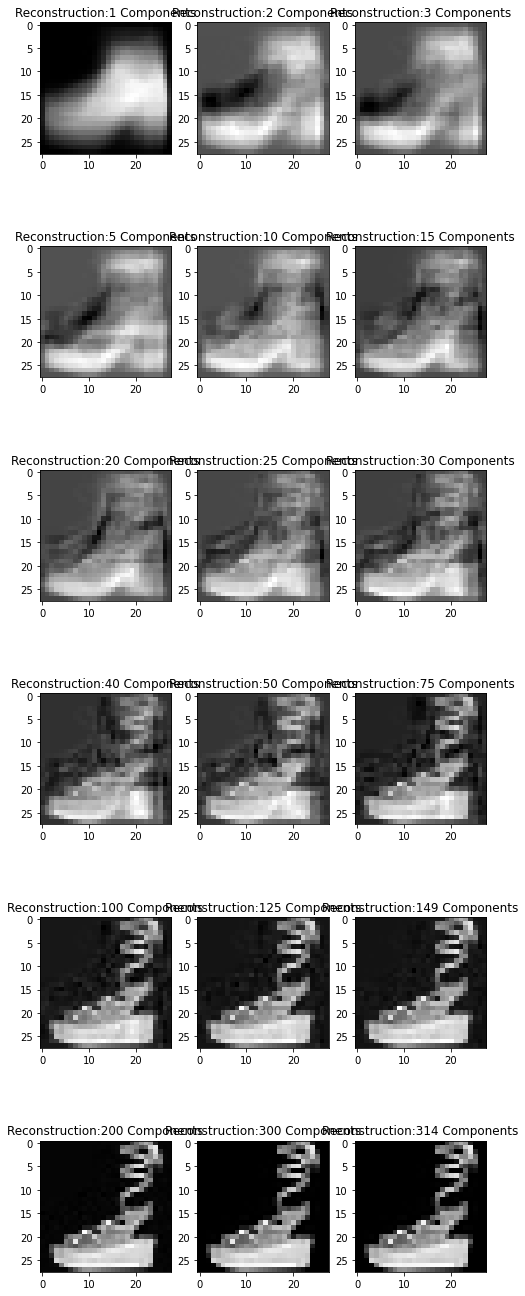

In [ ]:
nValues = [1, 2, 3, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100, 125, 149, 200, 300, 314]  # 149 covers 98% variance, 314 = max => 100% variance

rows = len(nValues)/3
fig = plt.figure(figsize=(8, rows * 4))

id = 10 #we will see reconstruction of image for x_new[10]

for i in range(len(nValues)):
    plt.subplot(rows, 3, i+1)
    Reconstruct(x_new, nValues[i], id)
    plt.title("Reconstruction:"+ str(nValues[i]) + " Components" )

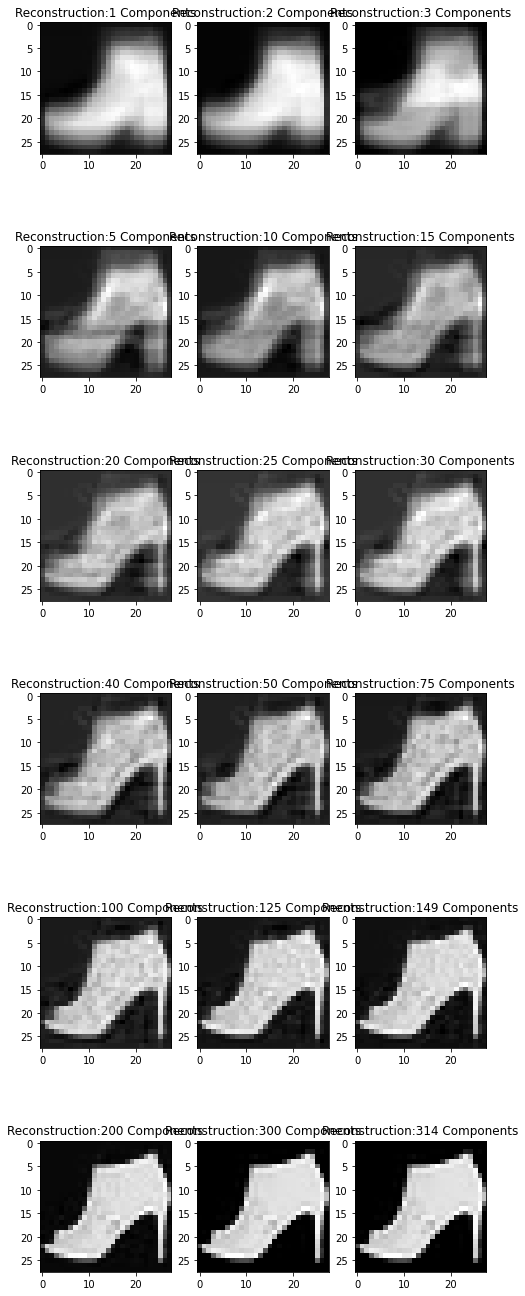

In [ ]:
nValues = [1, 2, 3, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100, 125, 149, 200, 300, 314]  # 149 covers 98% variance, 314 = max => 100% variance

rows = len(nValues)/3
fig = plt.figure(figsize=(8, rows * 4))

id = 20 #we will see reconstruction of image for x_new[20]

for i in range(len(nValues)):
    plt.subplot(rows, 3, i+1)
    Reconstruct(x_new, nValues[i], id)
    plt.title("Reconstruction:"+ str(nValues[i]) + " Components" )

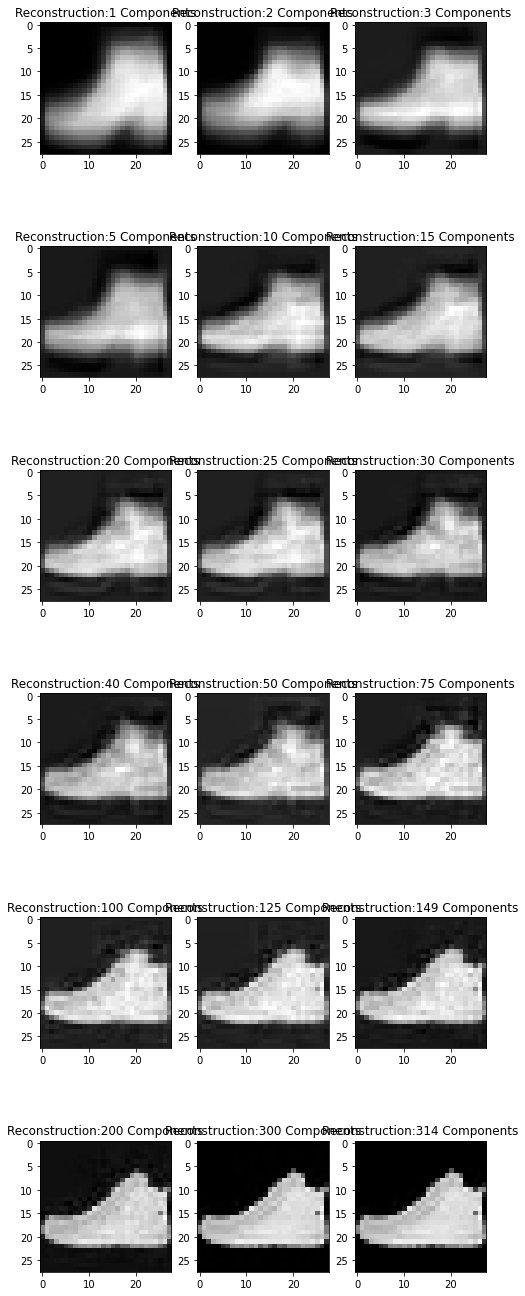

In [ ]:
nValues = [1, 2, 3, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100, 125, 149, 200, 300, 314]  # 149 covers 98% variance, 314 = max => 100% variance

rows = len(nValues)/3
fig = plt.figure(figsize=(8, rows * 4))

id = 30 #we will see reconstruction of image for x_new[30]

for i in range(len(nValues)):
    plt.subplot(rows, 3, i+1)
    Reconstruct(x_new, nValues[i], id)
    plt.title("Reconstruction:"+ str(nValues[i]) + " Components" )

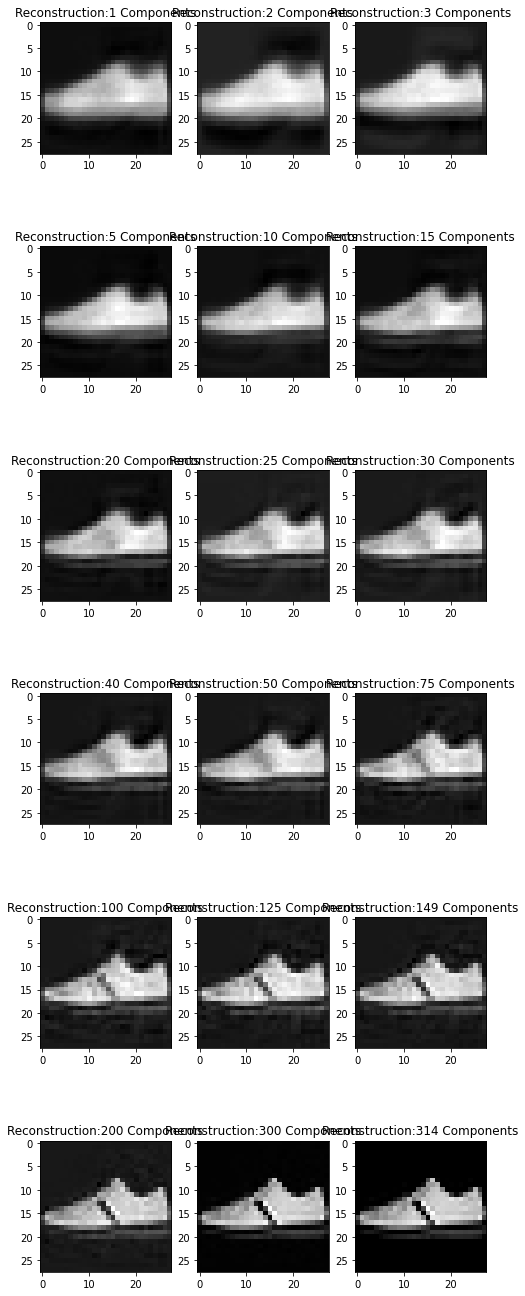

In [ ]:
nValues = [1, 2, 3, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100, 125, 149, 200, 300, 314]  # 149 covers 98% variance, 314 = max => 100% variance

rows = len(nValues)/3
fig = plt.figure(figsize=(8, rows * 4))

id = 40 #we will see reconstruction of image for x_new[40]

for i in range(len(nValues)):
    plt.subplot(rows, 3, i+1)
    Reconstruct(x_new, nValues[i], id)
    plt.title("Reconstruction:"+ str(nValues[i]) + " Components" )

From the above plots, I believe **75 components** is sufficient for a human to accurately guess the image

**To find: Compression Ratio for 75 components**

We have a dataset with 1000 samples, and 784 features for each sample: **X: (1000, 784)**. Total elements: **784,000**


1.   We apply PCA, we get **eigenVectors: (784, 784)**
2.   We determine only 75 PCs are enough: **requiredEigenVectors: (784, 75)**
3.   We apply projection: **X @ W_op = Proj (1000, 75)**
4.   Now data is summarized in **Proj:(1000,75)** and **requiredEigenVectors: (784, 75)** Total elements: **133,800**!!!
  * Compression Ratio = 784,000/133,800 = **5.86**
